In [ ]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3 
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:15 

In [ ]:
!pip install top2vec

In [ ]:
# !pip install top2vec[sentence_encoders]

     |████████████████████████████████| 4.4 MB 2.5 MB/s 
     |████████████████████████████████| 454.4 MB 10 kB/s 
     |████████████████████████████████| 1.2 MB 32.6 MB/s 
     |████████████████████████████████| 454.3 MB 19 kB/s 
     |████████████████████████████████| 462 kB 46.7 MB/s 
     |████████████████████████████████| 394.5 MB 390 bytes/s 
     |████████████████████████████████| 462 kB 52.2 MB/s 
     |████████████████████████████████| 394.5 MB 39 kB/s 
     |████████████████████████████████| 394.3 MB 12 kB/s 
     |████████████████████████████████| 394.7 MB 19 kB/s 
     |████████████████████████████████| 320.6 MB 57 kB/s 
     |████████████████████████████████| 320.5 MB 16 kB/s 
     |████████████████████████████████| 320.4 MB 18 kB/s 
     |████████████████████████████████| 320.4 MB 31 kB/s 
     |████████████████████████████████| 320.4 MB 60 kB/s 
     |████████████████████████████████| 516.4 MB 19 kB/s 
     |████████████████████████████████| 516.2 MB 22 kB/s 
     |█████

In [ ]:
# !pip install top2vec[sentence_transformer]

In [ ]:
import requests
import json
from top2vec import Top2Vec
import numpy as np

In [ ]:
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        'news_ids': ['01100201.20210910154641001'],
        # "published_at": {
        #     "from": "2021-09-08",
        #     "until": "2021-10-08"  # 날짜 미만의 기사 수집
        #     },
        #     "provider": [],
        #     "category": [],
        #     "category_incident": [""],
        #     "byline": "",
        #     "provider_subject": [""],
        #     "subject_info": [""],
        #     "subject_info1": [""],
        #     "subject_info2": [""],
        #     "subject_info3": [""],
        #     "subject_info4": [""],
        #     "sort": {"date": "asc"},
        #     "hilight": 200,
        #     "return_from": 0,
        #     "return_size": 100000,
            "fields": [
                "byline",
                "category",
                "category_incident",
                "provider_news_id",
                "hilight",
                ]
                }
         }

response = requests.post(url, data=json.dumps(datas))
js=response.json()

js



{'result': 0,
 'return_object': {'documents': [{'byline': '이다니엘',
    'category': ['스포츠>올림픽_아시안게임', 'IT_과학>콘텐츠', '스포츠>축구'],
    'category_incident': [],
    'dateline': '2021-09-10T15:45:44.000+09:00',
    'enveloped_at': '2021-09-10T15:46:41.000+09:00',
    'news_id': '01100201.20210910154641001',
    'provider': '국민일보',
    'provider_news_id': '0016258159',
    'published_at': '2021-09-10T00:00:00.000+09:00',
    'title': '첫걸음 뗀 한중일 대회, 국가대항전 표준 제시할까'}],
  'total_hits': 1}}

In [ ]:
print(js['return_object']['documents'][0].keys())
total_hits = js['return_object']['total_hits']
print("결과 개수:",total_hits)

dict_keys(['news_id', 'title', 'hilight', 'published_at', 'enveloped_at', 'dateline', 'provider', 'category', 'category_incident', 'byline', 'provider_news_id'])
결과 개수: 7780


In [ ]:
# total_hits = 10000
# 모든 타이틀
titles, hilights ,ths= [], [], []
for i in range(total_hits):
    title = js['return_object']['documents'][i]['title']
    hilight = js['return_object']['documents'][i]['hilight']
    th = title +","+ hilight

    #titles.append(title)
    #hilights.append(hilight)
    ths.append(th)

In [ ]:
np.random.seed(42)

In [ ]:
pip install --upgrade tbb

     |████████████████████████████████| 4.0 MB 5.4 MB/s 


In [ ]:
pip install konlpy

In [ ]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3 
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

from konlpy.tag import Mecab
mecab = Mecab()

model_a1 = Top2Vec(ths, tokenizer = mecab.morphs, umap_args = {'n_neighbors': 15, 'n_components': 5, 'metric': 'cosine', "random_state": 42})

TypeError: ignored

In [ ]:
# 학습

model_a1 = Top2Vec(ths, tokenizer = tokenizer.morphs, umap_args = {'n_neighbors': 15, 'n_components': 5, 'metric': 'cosine', "random_state": 42})
# model_b1 = Top2Vec(ths, doc2vec_args = {'seed' : 42}, umap_args = {'n_neighbors': 15, 'n_components': 5, 'metric': 'cosine', "random_state": 42})

2021-10-08 13:11:30,581 - top2vec - INFO - Pre-processing documents for training
2021-10-08 13:11:33,681 - top2vec - INFO - Creating joint document/word embedding
2021-10-08 13:12:38,974 - top2vec - INFO - Creating lower dimension embedding of documents
2021-10-08 13:13:02,388 - top2vec - INFO - Finding dense areas of documents
2021-10-08 13:13:02,662 - top2vec - INFO - Finding topics


In [ ]:

print(model_a1.get_num_topics())

# print(model_b1.get_num_topics())

160


In [ ]:
documents, document_scores, document_ids = model_a1.search_documents_by_topic(topic_num=2, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()


Document: 3242, Score: 0.8954926133155823
-----------
'오징어 게임' 한국 드라마 최초 미국 넷플릭스 1위,'오징어 게임' 한국 드라마 최초 미국 넷플릭스 1위 배우 이정재가 주연으로 나선 드라마 ..'오징어 게임'이 한국 작품 최초로 미국 넷플릭스에서 인기 작품 1위를 차지했습니다. .. ..넷플릭스 순위집계 사이트 플릭스 패트롤을 보면 ..'오징어 게임'은 미국에서 1위에 올랐고, 월드 랭킹 TV 쇼 부문에서도 2위를 기록했습니다. .. ..지금까지 한국..
-----------

Document: 3776, Score: 0.8937786221504211
-----------
韓 오리지널 '오징어게임' 넷플릭스 세계 1위 쾌거,韓 오리지널 ..'오징어게임' 넷플릭스 세계 1위 쾌거 넷플릭스 오리지널 시리즈 ..'오징어게임'이 우리나라 드라마 최초로 넷플릭스 시리즈 콘텐츠 1위를 차지했다... tvN 드라마 ..'갯마을 차차차'는 9위에 올랐다. .. ..글로벌 온라인동영상서비스(OTT) 순위 집계 사이트 플릭스 패트롤에 따르면 오징어게임은 24일 ..'넷플릭스 인기 TV프로그..
-----------

Document: 6123, Score: 0.8910825848579407
-----------
오징어 게임 인도에서도 1위...전세계 83개국에 통했다,오징어 게임 인도에서도 1위...전세계 83개국에 통했다 넷플릭스 드라마 오징어 게임이 인도에서도 넷플릭스 1위에 올랐다... 이로써 ..'오징어 게임'은 넷플릭스가 서비스되는 83개국 전체에서 1위를 기록했다. .. ..2일, 글로벌 OTT(온라인동영상서비스) 순위 집계 차트인 플릭스페트롤 차트는 오징어 게임이 83개 국가 중 덴마크와 터키 두 개 국..
-----------

Document: 3046, Score: 0.8812781572341919
-----------
넷플릭스 ‘오징어 게임’ 미국 1위, 전 세계 2위,넷플릭스 ..‘오징어 게임’ 미국 1위,

In [ ]:
topic_words, word_scores, topic_nums = model_a1.get_topics(160)

In [ ]:
topic_words[2]

array(['플릭스', '패트롤', '순위', '83', '집계', '오징어', '드라마', '인도', '차지', '개국',
       '오리지널', '넷플릭스', '올랐', '돌풍', '위', '일으키', '세계', '전', '현지', '기록',
       '기생충', '인기', '시리즈', '톱', '게임', '사로잡', '오른', '미국', '작품', '사상', '흥행',
       '사이트', 'OTT', '이어지', '영국', '도', '배우', '이정재', '프랑스', '황동혁', '외신',
       '456', '달고나', 'CNN', '1', '동영상', '끌', '전날', '따르', '팰런'],
      dtype='<U6')

In [ ]:
word_scores[11]

array([0.62507886, 0.5727786 , 0.5005838 , 0.4684388 , 0.4663683 ,
       0.4267586 , 0.3936888 , 0.39185944, 0.38843402, 0.38670686,
       0.37980548, 0.369438  , 0.34730327, 0.31946597, 0.31734478,
       0.31715044, 0.30286613, 0.30210823, 0.29914096, 0.29609236,
       0.2750338 , 0.27014297, 0.26314598, 0.26124078, 0.25255862,
       0.24801093, 0.23965976, 0.23578387, 0.23314448, 0.23122978,
       0.23122606, 0.23036149, 0.22669782, 0.22321723, 0.22277908,
       0.22249177, 0.22049747, 0.2189978 , 0.21416667, 0.20803611,
       0.20663637, 0.20580436, 0.20556043, 0.2050149 , 0.20408669,
       0.20107275, 0.19981   , 0.19895376, 0.19781199, 0.19213714],
      dtype=float32)

In [ ]:
squid_content = js['return_object']['documents'][0]['hilight']


url = 'http://tools.kinds.or.kr:8888/feature'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",
    "argument": {
        "title": '''
        '이정재 측 "넷플릭스 \'오징어게임\', 제안 받고 검토중"(공식입장)'
        ''', 
        "sub_title": "", 
        "content": f"{squid_content}" 
        }
}

response = requests.post(url, data=json.dumps(datas))
response.json()

{'result': 0,
 'return_object': {'result': {'content': '이정재|0.08825489164396068 넷플릭스|0.07826508761296858 오징어_게임|0.057054911027903873 아티스트컴퍼니|0.0495483078412826 소속사|0.048498675926925895 넷플릭스_오리지널|0.04695254089131794 소속사_아티스트컴퍼니|0.04502583091668381 시리즈_오징어|0.044697870063729536 측_넷플릭스_오징어게임|0.04253864354478296 소속사_아티스트컴퍼니_관계자|0.042362729822562846 사람들|0.04169268104907382 패배자|0.04051984122467682 관계자|0.038512637256750824 공식입장|0.038281328162907746 오징어게임|0.03793064650707744 검토중|0.03679140658226075 100억|0.02949058249150137 검토|7.786072356567795E-4 오징어|6.760653572735267E-4 게임|5.744592490465059E-4 제안|5.680076509015733E-4 출연|5.574800016936361E-4 공식|3.934845800176391E-4 인생|3.8924081159064073E-4 입장|3.820389740932617E-4 시리즈|3.8009307169440445E-4 오리지널|3.7950580858351805E-4 단계|3.6711195762544475E-4',
   'sub_title': '',
   'title': '넷플릭스|0.12306345345839738 이정재|0.10024158846826436 이정재_측_넷플릭스_오징어게임|0.09008127805142463 넷플릭스_오징어게임|0.08741432955941293 공식입장|0.08226376098846949 검토중|0.08158902381749446 공식|8.37

In [ ]:
!pip install pororo

     |████████████████████████████████| 256 kB 11.4 MB/s 
     |████████████████████████████████| 1.2 MB 45.8 MB/s 
     |████████████████████████████████| 1.7 MB 42.4 MB/s 
     |████████████████████████████████| 2.9 MB 49.5 MB/s 
     |████████████████████████████████| 5.9 MB 16.0 MB/s 
     |████████████████████████████████| 3.1 MB 39.6 MB/s 
     |████████████████████████████████| 468 kB 45.5 MB/s 
     |████████████████████████████████| 1.5 MB 40.2 MB/s 
     |████████████████████████████████| 78 kB 7.4 MB/s 
     |████████████████████████████████| 42.4 MB 1.4 MB/s 
     |████████████████████████████████| 748.8 MB 18 kB/s 
     |████████████████████████████████| 145 kB 49.8 MB/s 
     |████████████████████████████████| 90 kB 9.8 MB/s 
     |████████████████████████████████| 3.3 MB 39.1 MB/s 
     |████████████████████████████████| 1.2 MB 52.8 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 895 kB 41.0 MB/s 
     |██████████████

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
!pip install pororo

In [5]:
import json
# from pororo import Pororo
from itertools import combinations

In [6]:
with open('/content/drive/MyDrive/Newstring/data/sample2.json', 'r') as f:
   json_data = json.load(f)


In [30]:
json_data

{'000001': {'articles': [{'doc': "'오징어 게임', 韓드라마 최초 미국 넷플릭스 1위,'오징어 게임', 韓드라마 최초 미국 넷플릭스 1위 ..[헤럴드경제] 이정재가 출연하는 넷플릭스 드라마 ..'오징어 게임'이 한국 작품 최초로 미국 넷플릭스에서 인기 작품 1위에 올랐다... .. .. .. .. 22일 넷플릭스 순위 집계 사이트 플릭스 패트롤에 따르면 넷플릭스 한국 오리지널 시리즈 ..'오징어 게임'은 미국 인기 작품 1위, 월드 랭킹..",
    'news_id': '02100701.20210922201215002',
    'score': '0.88751763',
    'tag': ['오징어게임',
     '넷플릭스드라마',
     '넷플릭스',
     '넷플릭스드라마오징어게임',
     '1위헤럴드경제',
     '작품1위',
     '미국넷플릭스1위헤럴드경제',
     '드라마',
     '넷플릭스한국',
     '미국인기작품1위',
     '집계',
     '오징어',
     '미국인기',
     '인도',
     '오리지널',
     '미국넷플릭스',
     '미국',
     '차지',
     '플릭스',
     '인기작품',
     '한국작품',
     '1위',
     '83',
     '패트롤',
     '순위',
     '22일넷플릭스',
     '미국넷플릭스1위',
     '인기작품1위',
     '한국']},
   {'doc': "전세계가 푹 빠졌다…'오징어게임' 美 넷플릭스서 1위,전세계가 푹 빠졌다…'오징어게임' 美 넷플릭스서 1위 넷플릭스 오리지널 시리즈 ..'오징어 게임'이 전세계 넷플릭스 시리즈 인기 순위 2위에 오른 가운데 미국에서는 1위를 기록했다... .. .. .. ..22일 온라인동영상서비스(OTT) 콘텐츠 순위 집계 사이트인 플릭스 패트롤에 따르면 ..'오징어 게임'은 21일 넷플릭스 TV드라마 부문 ..'오늘의..",
    'news_

In [31]:
sts = Pororo(task="similarity", lang="ko")

In [32]:
article_nums = list(range(len(json_data['000001']['articles'])))


In [25]:
sts_k2v_dic= dict()
sts_v2k_dic= dict()

for i in combinations(article_nums, 2):
  sts_value = sts(json_data['000001']['articles'][0]['doc'], json_data['000001']['articles'][j]['doc'])
  sts_k2v_dic[sts_key] = sts_value
  sts_v2k_dic[sts_value] = sts_key


In [43]:
sts_v2k_dic.keys()

dict_keys([0.727, 0.739, 0.701, 0.81, 0.763, 0.668, 0.777, 0.883, 0.812, 0.767, 0.733, 0.715, 0.676, 0.758, 0.723, 0.818, 0.717, 0.679, 0.626, 0.768, 0.749, 0.738, 0.686, 0.842, 0.74, 0.734, 0.713, 0.7, 0.707, 0.753, 0.821, 0.708, 0.669, 0.721, 0.655, 0.672, 0.714, 0.77, 0.73, 0.722, 0.675, 0.656, 0.719, 0.62, 0.703, 0.755, 0.736, 0.698, 0.754, 0.772, 0.752, 0.801, 0.748, 0.706, 0.694, 0.775, 0.684, 0.757, 0.624, 0.761, 0.692, 0.76, 0.67, 0.66, 0.673, 0.68, 0.697, 0.674, 0.718, 0.794, 0.716, 0.695, 0.658, 0.687, 0.693, 0.577, 0.622, 0.611, 0.688, 0.822, 0.531, 0.65, 0.729, 0.766, 0.735, 0.683, 0.746, 0.682, 0.786, 0.607, 0.709, 0.726, 0.711, 0.61, 0.664, 0.732, 0.702, 0.643, 0.645, 0.764, 0.691, 0.765, 0.651, 0.771, 0.699, 0.866, 0.815, 0.868, 0.69, 0.925, 0.747, 0.841, 0.756, 0.652, 0.782, 0.728, 0.776, 0.71, 0.795, 0.72, 0.792, 0.712, 0.799, 0.785, 0.647, 0.82, 0.806, 0.743, 0.783, 0.773, 0.741, 0.667, 0.769, 0.751, 0.781, 0.816, 0.696, 0.599, 0.704, 0.633, 0.798, 0.572, 0.731, 0.644

In [42]:
[k for k, v in aa.items() if v[10:18] == '']

Object `sort` not found.


In [ ]:
article_nums = list(range(len(json_data['000001']['articles'])))

m_news = json_data['000001']['articles'][0]

id_ls = [json_data['000001']['articles'][i]['news_id'] for i in article_nums]

id2doc_dic = dict()
for i in article_nums:
  id2doc_dic[id_ls[i]] = json_data['000001']['articles'][i]['doc']
id2doc_dic



In [ ]:
date_ls

In [38]:
id_ls = []
for i in article_nums:
  id_ls.append(json_data['000001']['articles'][i]['news_id'])
  early_tl = min([id[9:] for id in id_ls])

In [54]:
import copy

In [55]:
date_ls = [id[9:] for id in id_ls]
date_ls = sorted(date_ls)
cand_date_ls = date_ls.copy()

In [ ]:
cand_date_ls

In [57]:
m_id = m_news['news_id']
score_ls = []
for target_id in id_ls:
  
  target_score = sts(id2doc_dic[m_id], id2doc_dic[target_id])
  score_ls.append(target_score)
score_ls


[0.969,
 0.727,
 0.739,
 0.701,
 0.81,
 0.763,
 0.668,
 0.777,
 0.883,
 0.812,
 0.767,
 0.733,
 0.715,
 0.733,
 0.676,
 0.758,
 0.723,
 0.818,
 0.717,
 0.679,
 0.626,
 0.768,
 0.739,
 0.749,
 0.738,
 0.686,
 0.842,
 0.74,
 0.734,
 0.676,
 0.713,
 0.7,
 0.707,
 0.753,
 0.821,
 0.708,
 0.669,
 0.721,
 0.655,
 0.672,
 0.714,
 0.74,
 0.7,
 0.707,
 0.77,
 0.73,
 0.722,
 0.675,
 0.656,
 0.719,
 0.62,
 0.703,
 0.768,
 0.755,
 0.686,
 0.736,
 0.77,
 0.698,
 0.754,
 0.772,
 0.752,
 0.703,
 0.801,
 0.748,
 0.706,
 0.74,
 0.694,
 0.775,
 0.684,
 0.757,
 0.758,
 0.624,
 0.761,
 0.692,
 0.752,
 0.713,
 0.76,
 0.67,
 0.66,
 0.673,
 0.717,
 0.68,
 0.697,
 0.674,
 0.723,
 0.715,
 0.718,
 0.794,
 0.716,
 0.695,
 0.736,
 0.733,
 0.658,
 0.713,
 0.687,
 0.695,
 0.693,
 0.577,
 0.68,
 0.718,
 0.622,
 0.611,
 0.688,
 0.822,
 0.757,
 0.531,
 0.752,
 0.65,
 0.706,
 0.73,
 0.763,
 0.729,
 0.698,
 0.766,
 0.735,
 0.669,
 0.767,
 0.748,
 0.687,
 0.675,
 0.683,
 0.746,
 0.682,
 0.786,
 0.607,
 0.709,
 0.726,
 0.

In [58]:
max(score_ls)

0.969

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


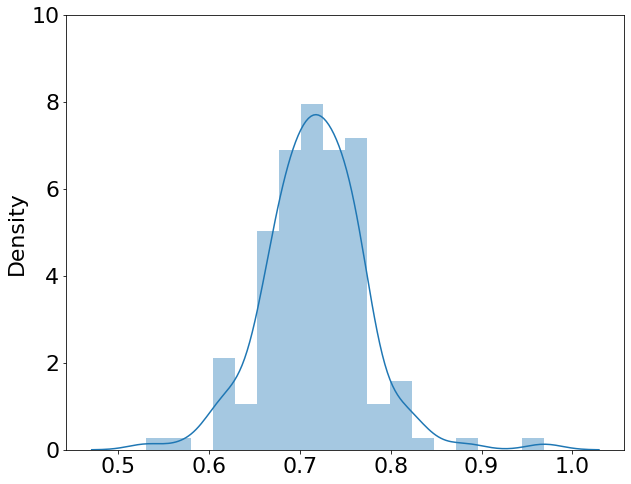

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


## boxplot
figure = plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 22})
plt.ylim(0, 10)
sns.distplot(x = score_ls)

In [ ]:
similar_score_idx = []
for i in len(score_ls):
  if score_ls[i] > 0.75:
    similar_score_idx.append(i)

similar_news_ls = []

In [68]:
score_ls.index(0.768)

21

In [ ]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk 
!pip install konlpy JPype1-py3 
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)



In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from konlpy.tag import Mecab
mecab = Mecab()

In [28]:
with open('/content/drive/MyDrive/Newstring/data/sample2.json', 'r') as f:
   json_data = json.load(f)

In [142]:
import requests
url = 'http://tools.kinds.or.kr:8888/search/news'

datas = {
    "access_key": "9af2f705-2974-4340-8b55-d69040b944ab",

    "argument": {
        "query": {"title":"오징어 게임"},
        "published_at": {
            "from": "2019-09-02",
            "until": "2021-10-06"
            },
            "provider": [],
            "category": ["008004000"],
            "category_incident": [""],
            "byline": "",
            "provider_subject": [""],
            "subject_info": [""],
            "subject_info1": [""],
            "subject_info2": [""],
            "subject_info3": [""],
            "subject_info4": [""],
            "sort": {"date": "asc"},
            "hilight": 200,
            "return_from": 0,
            "return_size": 100000,
            "fields": [
                "byline",
                "category",
                "category_incident",
                "provider_news_id",
                "hilight",
                ]
                }
         }

response = requests.post(url, data=json.dumps(datas))
additional=response.json()

additional

{'result': 0,
 'return_object': {'documents': [{'byline': '최보란',
    'category': ['문화>영화', '문화>방송_연예', 'IT_과학>콘텐츠'],
    'category_incident': [],
    'dateline': '2019-09-02T11:14:02.000+09:00',
    'enveloped_at': '2019-09-02T11:14:02.000+09:00',
    'hilight': '\'<b>오징어</b> <b>게임</b>\' 제작 세계적인 인터넷 엔터테인먼트 서비스 넷플릭스(Netflix)가 황동혁 감독과 손잡고 ....<b>오징어</b> <b>게임</b>\'은 인생의 패..\'<b>오징어</b> <b>게임</b>\'을 소개하게 될 것이란 생각에 기쁘고 설렌다"며 ..\'<b>오징어</b> <b>게임</b>\'은 <b>오징어</b> 모양을 이루는 동그라미, 세모, 네모 도형 그림 위에서 공격자와 수비자가 대치하는, 1980년대 초까지 유행했던 <b>게임</b>이다...',
    'news_id': '08100401.20190902111402001',
    'provider': 'YTN',
    'provider_news_id': '201909021112038420',
    'published_at': '2019-09-02T00:00:00.000+09:00',
    'title': "'남한산성' 황동혁 감독, 넷플릭스 손잡고 '오징어 게임' 제작"},
   {'byline': '이종길',
    'category': ['문화>방송_연예', '문화>영화', 'IT_과학>콘텐츠'],
    'category_incident': [],
    'dateline': '2019-09-02T22:34:24.000+09:00',
    'enveloped_at': '2019-09-02T22:34:24.000+09:00',
    'hilight': "'<b>오징어</b> <b>게

In [146]:
titles, hilights ,ths, news_ids= [], [], [],[]
for i in range(additional['return_object']['total_hits']):
    title = additional['return_object']['documents'][i]['title']
    hilight = additional['return_object']['documents'][i]['hilight']
    news_id = additional['return_object']['documents'][i]['news_id']
    news_ids.append(news_id)
    th = title +","+ hilight

    #titles.append(title)
    #hilights.append(hilight)
    ths.append(th)
len(ths)

837

In [31]:
# article_nums = list(range(len(json_data['000001']['articles'])))


# corpus = [json_data['000001']['articles'][i]['doc'] for i in article_nums]
# # corpus.extend(ths) 


# tfidfv = TfidfVectorizer(tokenizer = mecab.morphs).fit_transform(corpus)
# tfidfv.shape


(155, 1323)

In [147]:
article_nums = list(range(len(ths)))


corpus = ths.copy()
# corpus.extend(ths) 


tfidfv = TfidfVectorizer(tokenizer = mecab.morphs).fit_transform(corpus)
tfidfv.shape


(837, 5098)

In [ ]:
document_distances = (tfidfv * tfidfv.T)
document_distances.toarray()[0]



In [150]:
document_distances.toarray().shape

(837, 837)

In [ ]:
import copy

full_indices_set = set(article_nums)
clustered_indices = []
target = 0
remain_indices = full_indices_set.copy()

while True:
  similarities = document_distances.toarray()[target]
  sim_doc_indices = []
  for i, score in enumerate(similarities):
    if score > 0.3:

      sim_doc_indices.append(i)
  sim_doc_indices = set.intersection(set(sim_doc_indices), remain_indices)
  # sim_doc_list = [json_data['000001']['articles'][i]['doc'] for i in sim_doc_indices]    
  clustered_indices.append(sorted(list(sim_doc_indices)))

  remain_indices = remain_indices - set(sim_doc_indices)
  if len(list(remain_indices)) == 0:
    break
  
  target = list(remain_indices)[0]
  print(target)



In [167]:
clustered_indices

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  9,
  11,
  12,
  13,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  25,
  26,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  41,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  52,
  54,
  56,
  57,
  58,
  59,
  60,
  61,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  102,
  103,
  104,
  106,
  107,
  110,
  111,
  112,
  113,
  115,
  116,
  117,
  118,
  119,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  135,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  147,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  159,
  162,
  163,
  164,
  165,
  167,
  168,
  169,
  171,
  172,
  173,
  175,
  176,
  178,
  179,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  190,
 

In [ ]:
for indices in clustered_indices:
  idx = indices[0]
  print(idx, ':', ths[idx])
  print('-'*200)

In [164]:
# date_ls = []
# date2doc = dict()
# for indices in clustered_indices:
#   idx = indices[0]
#   date = json_data['000001']['articles'][idx]['news_id'][9:]
#   doc = json_data['000001']['articles'][idx]['doc']
  
#   date_ls.append(date)
#   date2doc[date] = doc
# date_ls = sorted(date_ls)

IndexError: ignored

In [165]:
date_ls = []
date2doc = dict()
for indices in clustered_indices:
  idx = indices[0]
  date = news_ids[idx][9:]
  doc = ths[idx]
  
  date_ls.append(date)
  date2doc[date] = doc
date_ls = sorted(date_ls)

In [166]:
for date in date_ls:
  print(date, ':', date2doc[date])
  print('-'*200)

20190902111402001 : '남한산성' 황동혁 감독, 넷플릭스 손잡고 '오징어 게임' 제작,'<b>오징어</b> <b>게임</b>' 제작 세계적인 인터넷 엔터테인먼트 서비스 넷플릭스(Netflix)가 황동혁 감독과 손잡고 ....<b>오징어</b> <b>게임</b>'은 인생의 패..'<b>오징어</b> <b>게임</b>'을 소개하게 될 것이란 생각에 기쁘고 설렌다"며 ..'<b>오징어</b> <b>게임</b>'은 <b>오징어</b> 모양을 이루는 동그라미, 세모, 네모 도형 그림 위에서 공격자와 수비자가 대치하는, 1980년대 초까지 유행했던 <b>게임</b>이다...
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
20200617141011001 : '오징어게임' 허성태· 위하준·김주령·정호연 캐스팅 확정,'<b>오징어게임</b>' 허성태· 위하준·김주령·정호연 캐스팅 확정 넷플릭스 오리지널 시리즈 ..'<b>오징어게임</b>'이 배우 이정재, 박해수에 이어 허성태, 위하준, 김주령, 정호연의 출연을 확정 지었다...'<b>오징어게임</b>' 측은 17일 허성태, 위하준, 김주령, 정호연의 출연 소식을 알렸다.....<b>오징어</b> <b>게임</b>'은 456억 원의 상금이 걸린 의문의 서바이벌 <b>게임</b>에 참가한 사..
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
cosine_sim = linear_kernel(tfidfv, tfidfv)

In [38]:
sim_doc_list

[]

In [20]:

similarities = cosine_sim.flatten()
similarities.shape


(24025,)